In [351]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

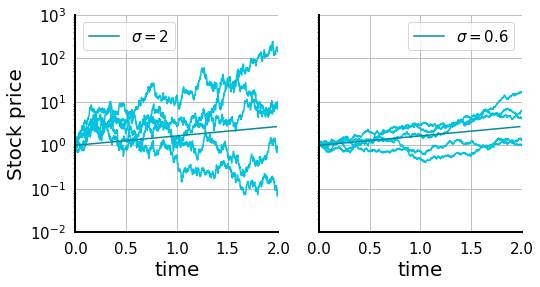

In [470]:

tmax=2
fig, ax = plt.subplots(1,2, figsize=(8,4),sharex=True,sharey=True)

for i in range(5):
    sarr=[]
    tarr=[]
    t=0
    s=1
    sig=2
    mu=0.5+sig**2/2
    dt=0.001*tmax
    while t<tmax:
        dW=np.random.normal(0,np.sqrt(dt))
        ds=s*(mu*dt+sig*dW)
        s+=ds
        t+=dt
        sarr.append(s)
        tarr.append(t)
    ax[0].plot(tarr,sarr,c="#00C3DF")
    x=np.arange(0,tmax,0.01*tmax)
ax[0].plot(x,np.exp((mu-sig**2/2)*x),c="#038A9D",label="$\sigma=$"+str(sig))
ax[0].legend(fontsize=15)

for i in range(5):
    sarr=[]
    tarr=[]
    t=0
    s=1
    sig=0.6
    mu=0.5+sig**2/2
    dt=0.001*tmax
    while t<tmax:
        dW=np.random.normal(0,np.sqrt(dt))
        ds=s*(mu*dt+sig*dW)
        s+=ds
        t+=dt
        sarr.append(s)
        tarr.append(t)
    ax[1].plot(tarr,sarr,c="#00C3DF")
    x=np.arange(0,tmax,0.01*tmax)
ax[1].plot(x,np.exp((mu-sig**2/2)*x),c="#038A9D",label="$\sigma=$"+str(sig))
ax[1].legend(fontsize=15)
ax[0].set_xlim(0,2)
ax[1].set_yscale("log")
ax[0].set_yscale("log")
plt.ylim(0.01,1000)
ax[0].set_xlabel("time",size=20)
ax[1].set_xlabel("time",size=20)
ax[0].set_ylabel("Stock price",size=20)
#ax[1].set_ylabel("Daily returns",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for l in [0,1]:
    #ax[l].set_xlim([0,tmax/doubling_time])
    #taqui=np.arange(0,(tmax+1)/doubling_time,step=1)
    #ax[l].set_xticks(np.array(taqui))
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Verizon
[9.87830422e-05]
Disney
[0.00069261]
Chevron
[-0.00019659]
Am_express
[7.78730473e-05]
Goldman_Sachs
[0.00034425]
home_depot
[0.00077901]
IBM
[-0.00022169]
Coke
[0.00016523]
jp_morgan
[0.00050907]


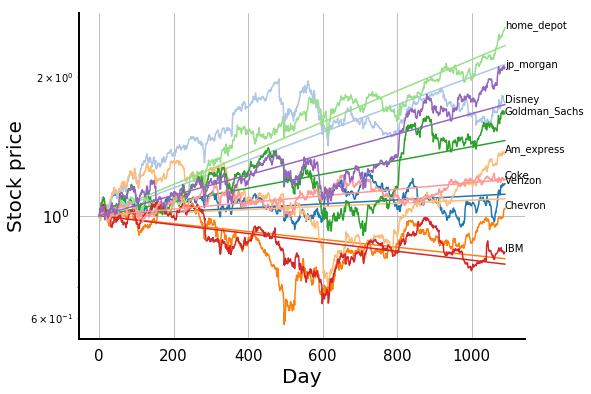

In [257]:
data=pd.read_csv("./data.csv")
names=data.Name.unique()
#data['Fecha']=pd.to_datetime(data.Fecha, format='%d-%m-%Y')
palette = plt.get_cmap('tab20')
num=0
fig, ax = plt.subplots(1,1, figsize=(8,6))
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    s0=np.array(dt.Open)[0]
    s=np.array(dt.Open)
    y=np.array(np.log(s/s0))
    x=np.arange(len(dt))
    model = LinearRegression(fit_intercept=False)
    model.fit(x.reshape((-1, 1)), y)
    mu0=model.coef_
    print(n)
    print(mu0)
    x=np.arange(len(dt))
    trend=np.exp(mu0*x)
    
    plt.plot(x,trend,color=palette(num))
    plt.plot(x,s/s0,color=palette(num))
    plt.text(x[-1],s[-1]/s0,n)
    num+=1
plt.yscale("log")
plt.grid()
plt.xlabel("Day",size=20)
plt.ylabel("Stock price",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Verizon
Average return = 4.0 % a year
Mean Volatility is = 0.376606886741689
Disney
Average return = 21.0 % a year
Mean Volatility is = 0.39210603754515283
Chevron
Average return = -0.0 % a year
Mean Volatility is = 0.442286764240587
Am_express
Average return = 10.0 % a year
Mean Volatility is = 0.4437462754891941
Goldman_Sachs
Average return = 17.0 % a year
Mean Volatility is = 0.45598528718462844
home_depot
Average return = 36.0 % a year
Mean Volatility is = 0.3659762828920445
IBM
Average return = -6.0 % a year
Mean Volatility is = 0.38809154488102315
Coke
Average return = 6.0 % a year
Mean Volatility is = 0.2790385956390466
jp_morgan
Average return = 27.0 % a year
Mean Volatility is = 0.42703217265275023


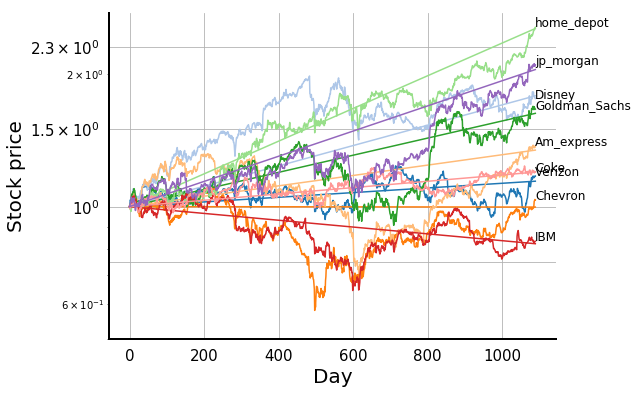

In [287]:
data=pd.read_csv("./data.csv")
names=data.Name.unique()
#data['Fecha']=pd.to_datetime(data.Fecha, format='%d-%m-%Y')
palette = plt.get_cmap('tab20')
num=0
fig, ax = plt.subplots(1,1, figsize=(8,6))
volarr=[]
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=5
    i0=r
    ydot=[]
    yy=[]
    timefit=[]
    model = LinearRegression()
    odfit=[]
    ss=1
    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        ydot.append(model.coef_)
        ss=ss*np.exp(model.coef_)
        yy.append(model.coef_)
        odfit.append(ss)
        timefit.append(x[i0])
        i0+=1
    #plt.plot(timefit,odfit,color=palette(num))
    plt.plot(x,dt.Open/np.exp(y)[0],color=palette(num))
    plt.text(x[-1],np.exp(y[-1]-y[0]),n,fontsize=12)
    print(n)
    print("Average return = "+str(np.trunc(100*((np.exp(np.mean(yy)))**365-1)))+" % a year")
    print("Mean Volatility is = "+str(100*np.std(np.exp(yy))/np.mean(np.exp(yy))))
    plt.plot(x,np.exp(np.mean(yy)*x),color=palette(num))
    volarr.append(np.std(np.exp(yy))/np.mean(np.exp(yy)))
    num+=1
plt.yscale("log")
plt.grid()
plt.xlabel("Day",size=20)
plt.ylabel("Stock price",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
taqui=[0.5,0.75,1,1.5,2.3]#(np.arange(0,(tmax+1)/doubling_time,step=1)
ax.set_yticks(taqui)

plt.savefig('./stockprice.eps',bbox_inches='tight',dpi=600)
plt.savefig('./stockprice.png',bbox_inches='tight',dpi=600)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data=pd.read_csv("./data.csv")
names=data.Name.unique()
#data['Fecha']=pd.to_datetime(data.Fecha, format='%d-%m-%Y')
palette = plt.get_cmap('tab20')
num=0
fig, ax = plt.subplots(1,1, figsize=(8,6))
volarr=[]
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=5
    i0=r
    ydot=[]
    yy=[]
    timefit=[]
    model = LinearRegression()
    odfit=[]
    ss=1
    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        ydot.append(model.coef_)
        ss=ss*np.exp(model.coef_)
        yy.append(model.coef_)
        odfit.append(ss)
        timefit.append(x[i0])
        i0+=1
    #plt.plot(timefit,odfit,color=palette(num))
    plt.plot(x,dt.Open/np.exp(y)[0],color=palette(num))
    plt.text(x[-1],np.exp(y[-1]-y[0]),n,fontsize=12)
    print(n)
    print("Average return = "+str(np.trunc(100*((np.exp(np.mean(yy)))**365-1)))+" % a year")
    print("Mean Volatility is = "+str(100*np.std(np.exp(yy))/np.mean(np.exp(yy))))
    plt.plot(x,np.exp(np.mean(yy)*x),color=palette(num))
    volarr.append(np.std(np.exp(yy))/np.mean(np.exp(yy)))
    num+=1
plt.yscale("log")
plt.grid()
plt.xlabel("Day",size=20)
plt.ylabel("Stock price",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
taqui=[0.5,0.75,1,1.5,2.3]#(np.arange(0,(tmax+1)/doubling_time,step=1)
ax.set_yticks(taqui)

plt.savefig('./stockprice.eps',bbox_inches='tight',dpi=600)
plt.savefig('./stockprice.png',bbox_inches='tight',dpi=600)

data=pd.read_csv("./data.csv")
names=data.Name.unique()
Covarray=np.zeros([len(names),len(names)])
nn=0
meanret=[]
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=5
    i0=r
    yy=[]
    model = LinearRegression()
    dt=0
    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        if dt>=5:
            yy.append(np.exp(model.coef_[0]))
            dt=0
        i0+=1
        dt+=1
    meanret.append(np.mean(yy))
    mm=0
    for m in names:
        dt2=data[data.Name==m]
        dt2['Date']=pd.to_datetime(dt2.Date, format='%m/%d/%Y')
        dt2=dt2.sort_values(by='Date',ascending=True)
        y=np.array(np.log(dt2.Open))
        x=np.arange(len(y))    
        r2=5
        j0=r
        yy2=[]
        model = LinearRegression()
        dt2=0
        while j0<len(y)-r2:
            tempy=y[j0-r2:j0+r2]
            tempx=x[j0-r2:j0+r2].reshape((-1, 1))
            model.fit(tempx, tempy)
            if dt2>=5:
                yy2.append(np.exp(model.coef_[0]))
                dt2=0
            j0+=1
            dt2+=1

        Covarray[nn,mm]=np.cov(yy,yy2)[0][1]
        mm+=1

    nn+=1

V=Covarray
    
muarr=[]
sigarr=[]
maxret=0
maxsig=0
xm=0
minsig=100000000
ret=0
xg=0
for l in range(10000):
    xarr=[1/len(meanret)+np.random.normal(0,2)]
    for m in range(len(meanret)-1):
        if (m==len(meanret)-2):
            x=1-np.sum(xarr)
        else:
            x = 1/len(meanret)+np.random.normal(0,2)
        xarr.append(x)
    r=np.matmul(meanret,xarr)
    ss=np.matmul(xarr,np.matmul(V,xarr))
    muarr.append(r)
    sigarr.append(ss)
    if (ss<minsig):
        ret=r
        xg=xarr
        minsig=ss
    if r>maxret:
        maxret=r
        maxter=ss
        xm=xarr
        
for l in range(20000):
    pert=[]
    for m in range(len(meanret)):
        if (m==len(meanret)-1):
            x=-np.sum(pert)
        else:
            x = np.random.normal(0,0.2)
        pert.append(x)
    xarr=np.array(xg)+np.array(pert)
    r=np.matmul(meanret,xarr)
    ss=np.matmul(xarr,np.matmul(V,xarr))
    muarr.append(r)
    sigarr.append(ss)
    if (ss<minsig):
        ret=r
        xg=xarr
        minsig=ss

i=0
print("To minimize the risk,")
for n in names:
   
    print("Invest "+str(round(100*xg[i],1))+"% on "+n)
    i+=1
print("And you will obtain a return of: "+str(round(100*(ret**365-1),1))+"%, at the end of the year") 


fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.stem(range(len(xg)), xg, use_line_collection=True)
u=0
for n in names:
    plt.text(u-0.5,xg[u]+0.01,n)
    u+=1
plt.grid()
plt.xlabel("Asset",size=20)
plt.ylabel("Inversion (%)",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
#plt.ylim(0,0.2)
plt.xlim(-1,9)
plt.xticks([])

fig, ax = plt.subplots(1,1, figsize=(6,6))
mm=muarr


plt.scatter(np.sqrt(np.array(sigarr)),100*(np.array(mm)-1),s=5)
plt.scatter(np.sqrt(minsig),100*((ret)-1),c='r')
#plt.scatter(np.sqrt(ss),100*(r-1),c='r')
#plt.scatter(np.sqrt(ss),100*((r)-1),c='r')
#plt.xlim(0.0010,0.0125000)
plt.xscale('log')
plt.grid()
plt.xlabel("Volatility",size=20)
plt.ylabel("Mean Daily return (%)",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
x=np.arange(0,0.05,0.001)
plt.plot(x,27*x,c='k')
x=np.arange(0,0.05,0.001)
plt.plot(x,-27*x+100*((ret)-1),c='k')

In [498]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


data=pd.read_csv("./data.csv")
names=data.Name.unique()
Covarray=np.zeros([len(names),len(names)])
nn=0
meanret=[]
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=5
    i0=r
    yy=[]
    model = LinearRegression()
    dt=0
    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        if dt>=5:
            yy.append(np.exp(model.coef_[0]))
            dt=0
        i0+=1
        dt+=1
    meanret.append(np.mean(yy))
    mm=0
    for m in names:
        dt2=data[data.Name==m]
        dt2['Date']=pd.to_datetime(dt2.Date, format='%m/%d/%Y')
        dt2=dt2.sort_values(by='Date',ascending=True)
        y=np.array(np.log(dt2.Open))
        x=np.arange(len(y))    
        r2=5
        j0=r
        yy2=[]
        model = LinearRegression()
        dt2=0
        while j0<len(y)-r2:
            tempy=y[j0-r2:j0+r2]
            tempx=x[j0-r2:j0+r2].reshape((-1, 1))
            model.fit(tempx, tempy)
            if dt2>=5:
                yy2.append(np.exp(model.coef_[0]))
                dt2=0
            j0+=1
            dt2+=1

        Covarray[nn,mm]=np.cov(yy,yy2)[0][1]
        mm+=1

    nn+=1

V=Covarray
    
muarr=[]
sigarr=[]
maxret=0
maxsig=0
xm=0
minsig=100000000
ret=0
xg=0
for l in range(10000):
    xarr=[1/len(meanret)+np.random.normal(0,2)]
    for m in range(len(meanret)-1):
        if (m==len(meanret)-2):
            x=1-np.sum(xarr)
        else:
            x = 1/len(meanret)+np.random.normal(0,2)
        xarr.append(x)
    r=np.matmul(meanret,xarr)
    ss=np.matmul(xarr,np.matmul(V,xarr))
    muarr.append(r)
    sigarr.append(ss)
    if (ss<minsig):
        ret=r
        xg=xarr
        minsig=ss
    if r>maxret:
        maxret=r
        maxter=ss
        xm=xarr
        
for l in range(20000):
    pert=[]
    for m in range(len(meanret)):
        if (m==len(meanret)-1):
            x=-np.sum(pert)
        else:
            x = np.random.normal(0,0.2)
        pert.append(x)
    xarr=np.array(xg)+np.array(pert)
    r=np.matmul(meanret,xarr)
    ss=np.matmul(xarr,np.matmul(V,xarr))
    muarr.append(r)
    sigarr.append(ss)
    if (ss<minsig):
        ret=r
        xg=xarr
        minsig=ss

i=0
print("To minimize the risk,")
for n in names:
   
    print("Invest "+str(round(100*xg[i],1))+"% on "+n)
    i+=1
print("And you will obtain a return of: "+str(round(100*(ret**365-1),1))+"%, at the end of the year") 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


To minimize the risk,
Invest 6.7% on Verizon
Invest 12.9% on Disney
Invest -9.8% on Chevron
Invest -0.7% on Am_express
Invest -10.4% on Goldman_Sachs
Invest 15.3% on home_depot
Invest 11.6% on IBM
Invest 52.9% on Coke
Invest 21.6% on jp_morgan
And you will obtain a return of: 12.5%, at the end of the year


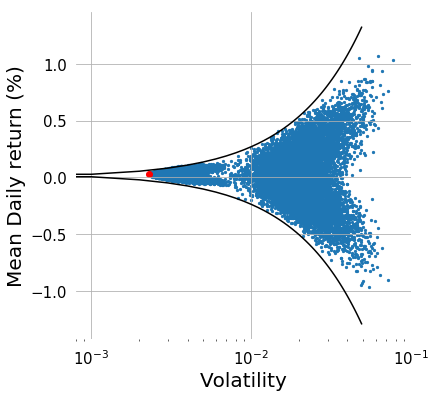

In [526]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
mm=muarr


plt.scatter(np.sqrt(np.array(sigarr)),100*(np.array(mm)-1),s=5)
plt.scatter(np.sqrt(minsig),100*((ret)-1),c='r')
#plt.scatter(np.sqrt(ss),100*(r-1),c='r')
#plt.scatter(np.sqrt(ss),100*((r)-1),c='r')
#plt.xlim(0.0010,0.0125000)
plt.xscale('log')
plt.grid()
plt.xlabel("Volatility",size=20)
plt.ylabel("Mean Daily return (%)",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
x=np.arange(0,0.05,0.001)
plt.plot(x,27*x,c='k')
x=np.arange(0,0.05,0.001)
plt.plot(x,-27*x+100*((ret)-1),c='k')
#yy=np.arange(0.99,1.01,0.001)
#xx=np.sqrt(minsig))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'use_line_collection'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


([], <a list of 0 Text xticklabel objects>)

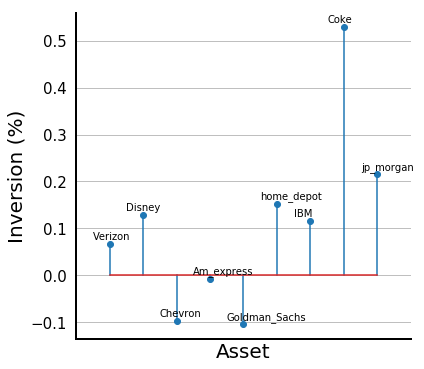

In [504]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.stem(range(len(xg)), xg, use_line_collection=True)
u=0
for n in names:
    plt.text(u-0.5,xg[u]+0.01,n)
    u+=1
plt.grid()
plt.xlabel("Asset",size=20)
plt.ylabel("Inversion (%)",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
#plt.ylim(0,0.2)
plt.xlim(-1,9)
plt.xticks([])

In [496]:
volarr/np.sum(volarr)-xx

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'use_line_collection'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


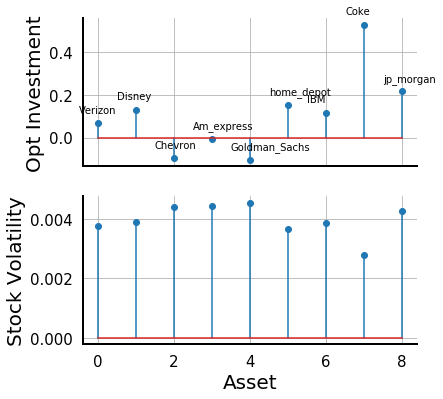

In [525]:
fig, ax = plt.subplots(2,1, figsize=(6,6),sharex=True)
ax[1].stem(range(len(xg)), volarr, use_line_collection=True)
ax[0].stem(range(len(xg)), xg, use_line_collection=True)
plt.xlabel("Asset",size=20)
ax[0].set_ylabel("Opt Investment",size=20)
ax[1].set_ylabel("Stock Volatility",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for l in [0,1]:
    #ax[l].set_xlim([0,tmax/doubling_time])
    #taqui=np.arange(0,(tmax+1)/doubling_time,step=1)
    #ax[l].set_xticks(np.array(taqui))
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)

u=0    
for n in names:
    ax[0].text(u-0.5,xg[u]+0.05,n)
    u+=1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


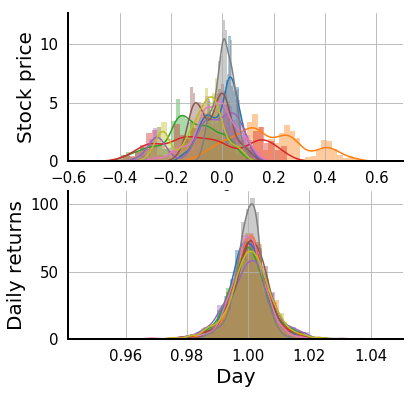

In [111]:
fig, ax = plt.subplots(2,1, figsize=(6,6))
num=0
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=2
    i0=r
    ydot=[]
    yy=[]
    timefit=[]
    model = LinearRegression()
    odfit=[]
    ss=1
    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        ydot.append(model.coef_)
        ss=ss*np.exp(model.coef_)
        yy.append(model.coef_)
        odfit.append(ss)
        timefit.append(x[i0])
        i0+=1
    #plt.plot(timefit,odfit,color=palette(num))
    v=(dt.Open/np.exp(y)[0]-np.exp(np.mean(yy)*x))/(np.exp(np.mean(yy)*x))
    #plt.plot(x,z,color=palette(num))
    sns.distplot(v,ax=ax[0],bins=30,norm_hist=True)
    sns.distplot(np.exp(yy),ax=ax[1],bins=30,norm_hist=True)
    num+=1

plt.xlabel("Day",size=20)
ax[0].set_ylabel("Stock price",size=20)
ax[1].set_ylabel("Daily returns",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for l in [0,1]:
    #ax[l].set_xlim([0,tmax/doubling_time])
    #taqui=np.arange(0,(tmax+1)/doubling_time,step=1)
    #ax[l].set_xticks(np.array(taqui))
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)
    #plt.text(x[-1],np.exp(y[-1]-y[0]),n,fontsize=12)
    #print(n)
    #print("Average return = "+str(np.trunc(100*((np.exp(np.mean(yy)))**365-1)))+" % a year")
    #print("Mean Volatility is = "+str(100*np.std(np.exp(yy))/np.mean(np.exp(yy))))
    #plt.plot(x,),color=palette(num))
plt.savefig('./stockdist.eps',bbox_inches='tight',dpi=600)
plt.savefig('./stockdist.png',bbox_inches='tight',dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(0, 100)

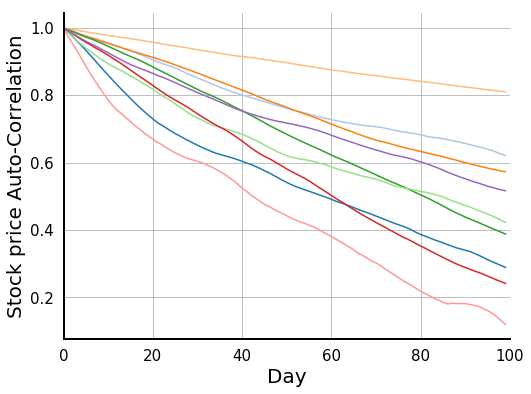

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
palette = plt.get_cmap('tab20')

fig, ax = plt.subplots(1,1, figsize=(8,6))
data=pd.read_csv("./data.csv")
names=data.Name.unique()
Covarray=np.zeros([len(names),len(names)])
nn=0
meanret=[]
num=0
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=2
    i0=r
    yy=[]

    model = LinearRegression()

    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        yy.append(model.coef_[0])
        i0+=1
    autocorr=[]
    v=((dt.Open/np.exp(y)[0]-np.exp(np.mean(yy)*x))/(np.exp(np.mean(yy)*x))).tolist()
    for l in range(100):
        p=[]
        f=[]
        for m in range(len(v)-l):
            p.append(v[m])
            f.append(v[m+l])
        autocorr.append(np.corrcoef(p,f)[0][1])
    plt.plot(autocorr,color=palette(num))
    meanret.append(np.mean(yy))
    num+=1
    nn+=1
plt.grid()
plt.xlabel("Day",size=20)
plt.ylabel("Stock price Auto-Correlation",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.xlim([0,100])
#taqui=[0.5,0.75,1,1.5,2.3]#(np.arange(0,(tmax+1)/doubling_time,step=1)
#ax.set_yticks(taqui)

#plt.savefig('./autocorr.eps',bbox_inches='tight',dpi=600)
#plt.savefig('./autocorr.png',bbox_inches='tight',dpi=600)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


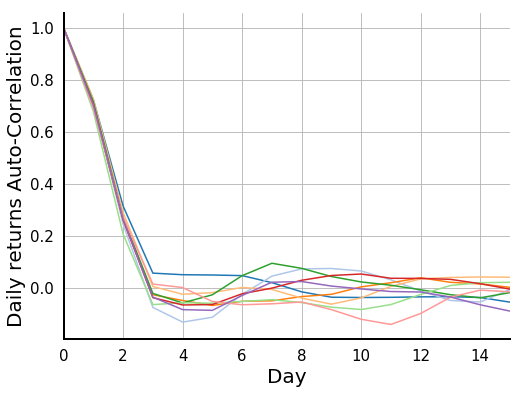

In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
palette = plt.get_cmap('tab20')

fig, ax = plt.subplots(1,1, figsize=(8,6))
data=pd.read_csv("./data.csv")
names=data.Name.unique()
Covarray=np.zeros([len(names),len(names)])
nn=0
meanret=[]
num=0
for n in names:
    dt=data[data.Name==n]
    dt['Date']=pd.to_datetime(dt.Date, format='%m/%d/%Y')
    dt=dt.sort_values(by='Date',ascending=True)
    y=np.array(np.log(dt.Open))
    x=np.arange(len(y))    
    r=2
    i0=r
    yy=[]

    model = LinearRegression()

    while i0<len(y)-r:
        tempy=y[i0-r:i0+r]
        tempx=x[i0-r:i0+r].reshape((-1, 1))
        model.fit(tempx, tempy)
        yy.append(np.exp(model.coef_[0]))
        i0+=1
    autocorr=[]
    for l in range(20):
        p=[]
        f=[]
        for m in range(len(yy)-l):
            p.append(yy[m])
            f.append(yy[m+l])
        autocorr.append(np.corrcoef(p,f)[0][1])
    plt.plot(autocorr,color=palette(num))
    meanret.append(np.mean(yy))
    num+=1
    nn+=1
plt.grid()
plt.xlabel("Day",size=20)
plt.ylabel("Daily returns Auto-Correlation",size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
#taqui=[0.5,0.75,1,1.5,2.3]#(np.arange(0,(tmax+1)/doubling_time,step=1)
#ax.set_yticks(taqui)
plt.xlim([0,15])
plt.savefig('./autocorr.eps',bbox_inches='tight',dpi=600)
plt.savefig('./autocorr.png',bbox_inches='tight',dpi=600)